In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt  # This line was missing

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

Introduction

When studying oligiopolies, one kind of monopolistic competition is called Cournot competition. In the Cournot model firms compete in quantities of output. 

In our assignment we want to analyze what happens, when two firms have an output competition. 
For simplicity, we assume constant MC for both firms. 

The price is determined by the output produced by the two firms together, via the inverse demand function. They choose their output quantity simultaneously. 

Furthermore we are assuming a linear demand curve. 


Model description

In this assignment, we will be analyzing a Cournot duopoly. We assume, that both firms follow a linear demand curve given by: P( = P(Q) = m*(q1 + q2) + b, where m is the parameter for the slope of the price functions and b are the intercept of the price functions.

The costs for the firms are given by: C1 = c*q1 and C2 = c*q2. 

The profit for the two firms are given by:

pi1 = P*q1 - C1 = m*q1**2 + m*q1*q2 - c*q1
pi2 = P*q2 - C2 = m*q2**2 + m*q1*q2 - c*q2


In a cournot duopoly firms want to mazimize profit. The equilibrium is present for q1 and q2 that satisfies the following;

argmax pi1 wrt. q1 and argmax pi2 wrt. q2.

If the two equations above are solved for respectively q1* and q2*, we have the best response functions. The best response functions tells us, what firm1 and firm2's optimal output for every possible output player 2 can choose. The equilibrium is found, by subsituting q2* into q1* and solving for q1*, we have the equilibrium output for firm 1. The same is done for firm 2, to find the equilibirum output for firm 2.  

Defining the model in python

In [2]:
#Define variables in sympy

p = sm.symbols("p") #Market price
q1 = sm.symbols("q1") #Output firm 1
q2 = sm.symbols("q2") #Output firm 2
c = sm.symbols("c") #Marginal profit
pi1 = sm.symbols("pi1") #Profit for firm 1
pi2 = sm.symbols("pi2") #Profit for firm 2
m = sm.symbols("m") #Parameter for the slope of the price function
b = sm.symbols("b") # Intercept of the price function
C1 = sm.symbols("C1") #Costs for firm 1
C2 = sm.symbols("C2") #Costs for firm 2
P = sm.symbols("P")


#Define cost functions
cost1 = sm.Eq(C1, c*q1) #Costs for firm 1
cost2 = sm.Eq(C2, c*q2) #Costs for firm 2

#Define price function
price_function = sm.Eq(P,m*(q1+q2) + b)

#Define profit for firm 1
profit1 =  m*q1**2 + m*q1*q2 + b*q1 - c*q1

#Define profit for firm 2
profit2 =  m*q2**2 + m*q1*q2 + b*q2 - c*q2


print("Profit firm 1 = ", profit1)
print("Profit firm 2 =", profit2)

Profit firm 1 =  b*q1 - c*q1 + m*q1**2 + m*q1*q2
Profit firm 2 = b*q2 - c*q2 + m*q1*q2 + m*q2**2


In Cournot the equilibrium is found, where the two firms best response functions intersect. Therefore, we find the expressions for the best response functions

In [3]:
#First order derivative of profit for firm 1 wrt. q1 
objective1 = sm.diff(profit1, q1)

#First order derivative of profit for firm 2 wrt. q2
objective2 = sm.diff(profit2, q2)

#To find the best response functions, we isolate q1* and q2*
BR1 = sm.solve(objective1, q1)[0] 
BR2 = sm.solve(objective2, q2)[0]

display("Best response function for firm 1 = ", BR1)
display("Bets response function for firm 2 = ",BR2)


'Best response function for firm 1 = '

(-b + c - m*q2)/(2*m)

'Bets response function for firm 2 = '

(-b + c - m*q1)/(2*m)

A Nash Equilibrium in Cournot is where, both firms use their best reponse function. Graphically, this is where the two best response functions intersect. This is shown below. 

To find the equilibirum, we assume we know the values of m, b and c. 

In [5]:
import numpy as np
from scipy.optimize import minimize

# Parameters
m_val, b_val, c_val = 1, 50, 10  # Example values for m, b, c

# Define the profit functions with simple overflow checks
def profit1(q1, q2):
    return -(m_val * q1**2 + m_val * q1 * q2 + b_val * q1 - c_val * q1)
  
def profit2(q2, q1):
    return -(m_val * q2**2 + m_val * q1 * q2 + b_val * q2 - c_val * q2)
 
# Define the best response functions using numerical optimization
def best_response1(q2):
    result = minimize(lambda q1: profit1(q1, q2), x0=10, bounds=[(0, 50)])
    return result.x[0]

def best_response2(q1):
    result = minimize(lambda q2: profit2(q2, q1), x0=10, bounds=[(0, 50)])
    return result.x[0]

# Define the function to find the equilibrium by minimizing the squared differences
def find_equilibrium(x):
    q1, q2 = x
    br1 = best_response1(q2)
    br2 = best_response2(q1)
    return (q1 - br1)**2 + (q2 - br2)**2


# Initial guess closer to expected reasonable values
initial_guess = [10, 10]  # Assuming 20 is a middle-ground starting point

# Optimization to find the equilibrium
result = minimize(find_equilibrium, initial_guess, bounds=[(0, None), (0, None)])

# Output the equilibrium quantities
q1_equilibrium, q2_equilibrium = result.x
print("Equilibrium quantities:")
print("q1* =", q1_equilibrium)
print("q2* =", q2_equilibrium)

Equilibrium quantities:
q1* = 49.99999999500508
q2* = 49.99999999500508


Graphically this can be shown as:

OBS: the below is not correct. If you can fix it, it would be great

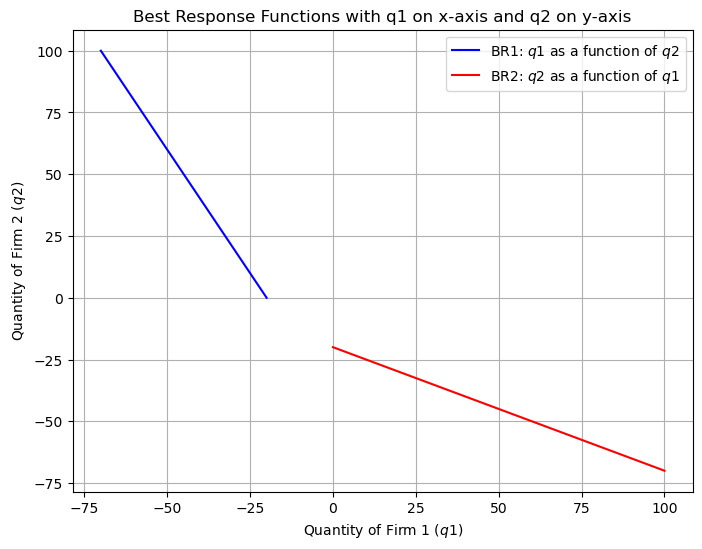

In [7]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
q1, q2, c, pi1, pi2, m, b, C1, C2, P = sm.symbols('q1 q2 c pi1 pi2 m b C1 C2 P')

# Define cost functions
cost1 = sm.Eq(C1, c*q1)  # Costs for firm 1
cost2 = sm.Eq(C2, c*q2)  # Costs for firm 2

# Define price function
price_function = sm.Eq(P, m*(q1+q2) + b)

# Define profit for firm 1
profit1 =  m*q1**2 + m*q1*q2 + b*q1 - c*q1

# Define profit for firm 2
profit2 =  m*q2**2 + m*q1*q2 + b*q2 - c*q2

# Differentiate profits with respect to their quantities
objective1 = sm.diff(profit1, q1)
objective2 = sm.diff(profit2, q2)

# Solve for best response functions
BR1 = sm.solve(objective1, q1)[0] 
BR2 = sm.solve(objective2, q2)[0]

# Parameter values
m_val, b_val, c_val = 1, 50, 10

# Substitute parameter values into the best response functions
BR1_func = sm.lambdify(q2, BR1.subs({m: m_val, b: b_val, c: c_val}))
BR2_func = sm.lambdify(q1, BR2.subs({m: m_val, b: b_val, c: c_val}))

# Generate a range of quantities for plotting
q_range = np.linspace(0, 100, 400)

# Calculate best responses over the range
BR1_values = BR1_func(q_range)  # q1 as a function of q2
BR2_values = BR2_func(q_range)  # q2 as a function of q1

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(BR1_values, q_range, label='BR1: $q1$ as a function of $q2$', color='blue')  # BR1 as function of q2
plt.plot(q_range, BR2_values, label='BR2: $q2$ as a function of $q1$', color='red')  # BR2 as function of q1
plt.xlabel('Quantity of Firm 1 ($q1$)')
plt.ylabel('Quantity of Firm 2 ($q2$)')
plt.title('Best Response Functions with q1 on x-axis and q2 on y-axis')
plt.legend()
plt.grid(True)
plt.show()

To extend the model, we will look at, what happens when more firms enter the market.